In [106]:
import numpy as np
from tensorflow.keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
def load_mnist_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # reshape and normalize training and test data
    x_train = x_train.reshape(x_train.shape[0], -1) / 255
    x_test = x_test.reshape(x_test.shape[0], -1) / 255

    digit_images = []
    labels = []
    for i in range(10):
        images = x_train[y_train == i]
        digit_images.append(images[np.random.choice(len(images), 
                            1000, replace=False)])
        labels.append(np.full((1000,), i))

    x_train = np.vstack(digit_images)
    y_train = np.hstack(labels)

    # shuffle training data
    order = np.random.permutation(x_train.shape[0])
    x_train = x_train[order]
    y_train = y_train[order]

    # take 1000 examples for the test set
    test_indices = np.random.choice(x_test.shape[0], 1000)
    x_test = x_test[test_indices]
    y_test = y_test[test_indices]
    return (x_train, y_train), (x_test, y_test)

In [108]:
def least_squares(A, b, factor=1.0):
    return np.linalg.inv((A.T @ A) + factor * np.eye(A.shape[1])) @ (A.T @ b)

In [109]:
def confusion_matrix(y_true, y_pred, num_labels):
    matrix = np.zeros(shape=(num_labels, num_labels), dtype=int)
    for i in range(len(y_pred)):
        matrix[y_true[i], y_pred[i]] += 1
    return matrix

In [110]:
def main():
    (x_train, y_train), (x_test, y_test) = load_mnist_data()
    coeff = np.zeros((x_train.shape[1], 10))
    for i in range(10):
        b = 2 * (y_train == i) - 1
        coeff[:, i] = least_squares(x_train, b)
    preds = np.argmax(x_test @ coeff, axis=1).astype(int)
    print(f'Accuracy : {(np.mean(preds == y_test) * 100):.4f}%\n')
    
    cnf_mat = confusion_matrix(y_test, preds, 10)
    sns.heatmap(cnf_mat, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy : 84.9000%



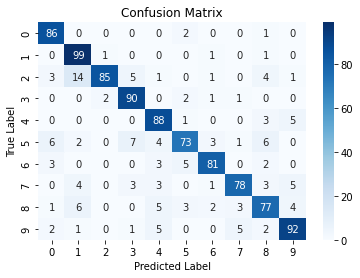

In [111]:
if __name__ == "__main__":
    main()